In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/intro-to-data-cleaning-eda-and-machine-learning.html
/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv


In [2]:
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,5)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv("/kaggle/input/intro-to-data-cleaning-eda-and-machine-learning/bi.csv",  encoding="latin1")

In [4]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [5]:
# Shape & structure
print(df.shape)
print(df.info())

(77, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None


In [6]:
# Summary statistics
print(df.describe(include="all"))

        fNAME     lNAME        Age  gender country residence  entryEXAM  \
count      77        77  77.000000      77      77        77  77.000000   
unique     71        66        NaN       6      16         6        NaN   
top     Hanna  Pedersen        NaN  Female  Norway   Private        NaN   
freq        2         2        NaN      41      47        33        NaN   
mean      NaN       NaN  35.207792     NaN     NaN       NaN  76.753247   
std       NaN       NaN  10.341966     NaN     NaN       NaN  16.475784   
min       NaN       NaN  21.000000     NaN     NaN       NaN  28.000000   
25%       NaN       NaN  27.000000     NaN     NaN       NaN  69.000000   
50%       NaN       NaN  33.000000     NaN     NaN       NaN  80.000000   
75%       NaN       NaN  42.000000     NaN     NaN       NaN  90.000000   
max       NaN       NaN  71.000000     NaN     NaN       NaN  98.000000   

       prevEducation  studyHOURS     Python          DB  
count             77   77.000000  75.0000

In [7]:
# Missing values check
print(df.isnull().sum())

# Unique values check (standardization verification)
print(df['gender'].unique())
print(df['country'].unique())
print(df['prevEducation'].unique())


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64
['Female' 'M' 'Male' 'F' 'female' 'male']
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [8]:
df['Python'].fillna(df['Python'].mean(), inplace=True)


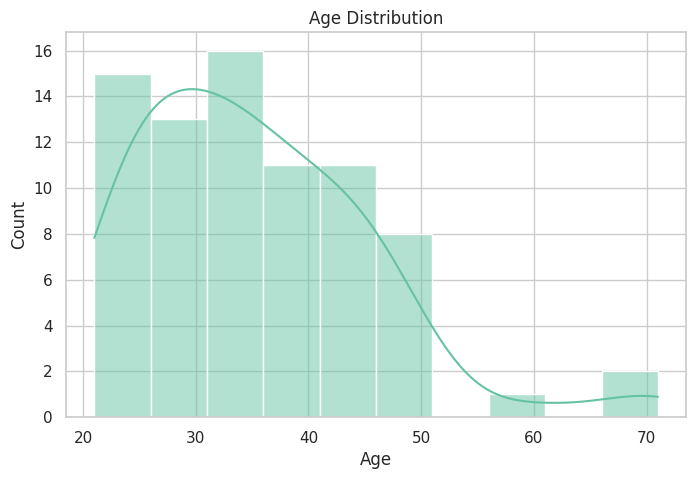

In [9]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

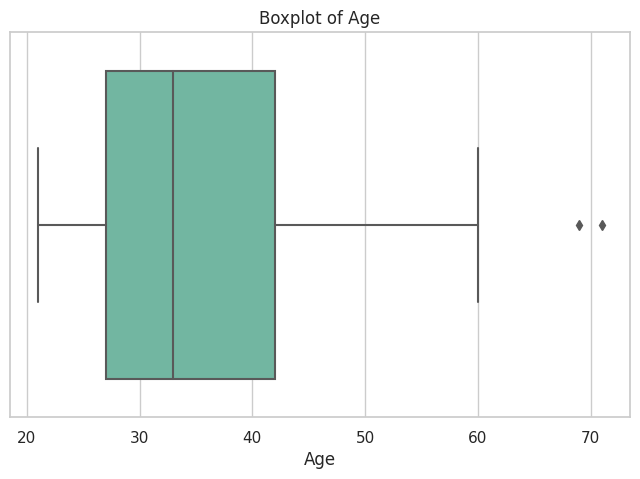

In [10]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

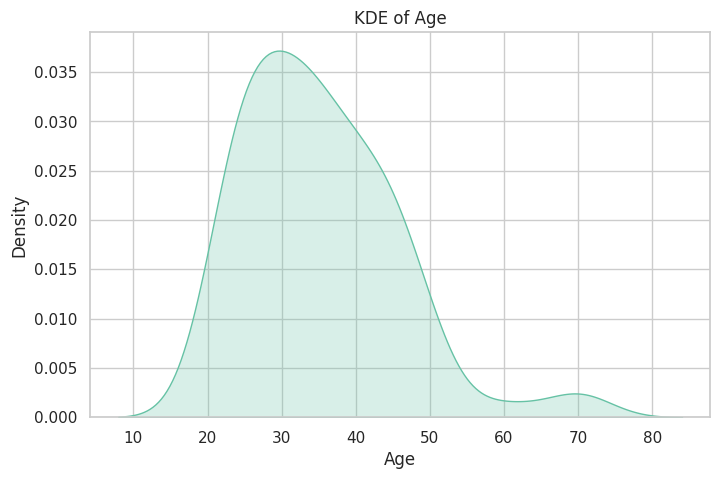

In [11]:
sns.kdeplot(df['Age'], shade=True)
plt.title("KDE of Age")
plt.show()

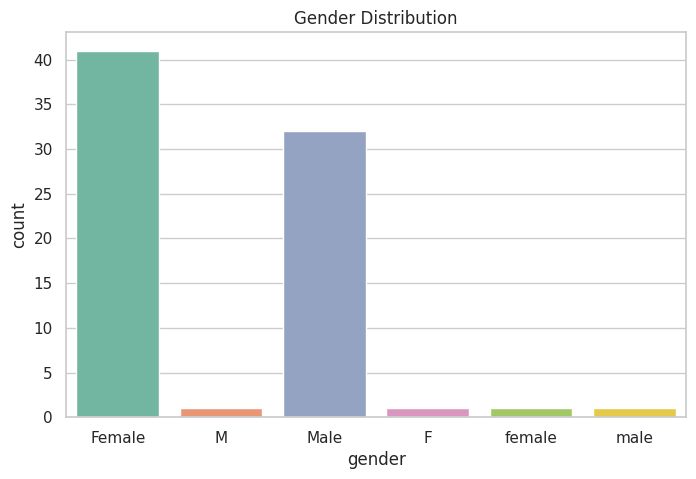

In [12]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

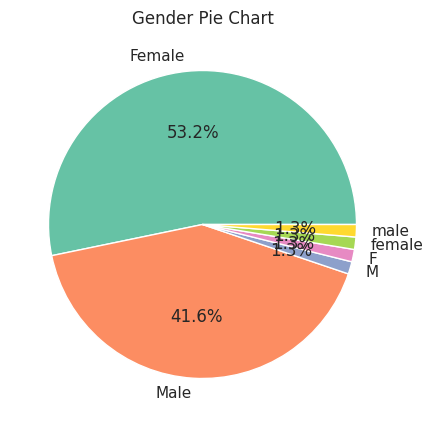

In [13]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Gender Pie Chart")
plt.ylabel("")
plt.show()

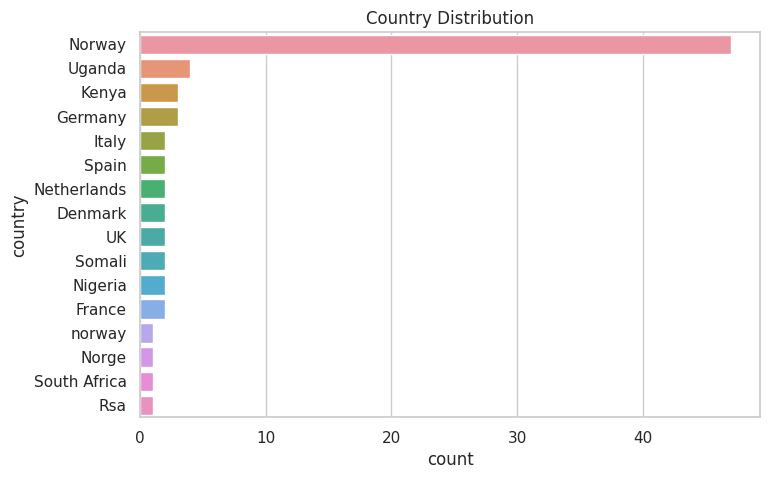

In [14]:
sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
plt.title("Country Distribution")
plt.show()

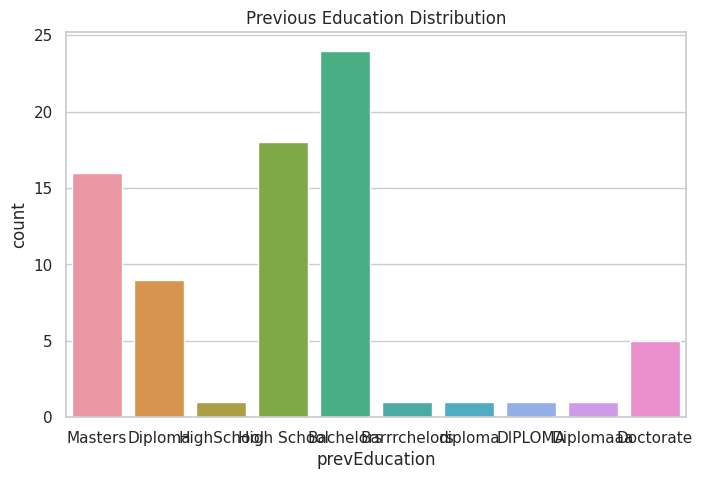

In [15]:
sns.countplot(x='prevEducation', data=df)
plt.title("Previous Education Distribution")
plt.show()

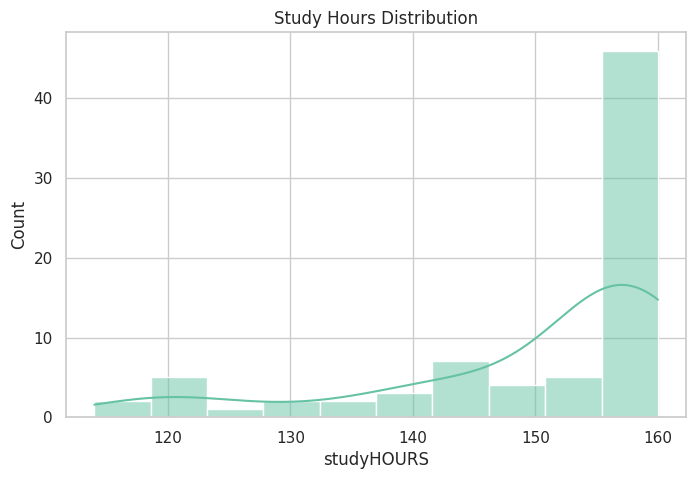

In [16]:
sns.histplot(df['studyHOURS'], bins=10, kde=True)
plt.title("Study Hours Distribution")
plt.show()

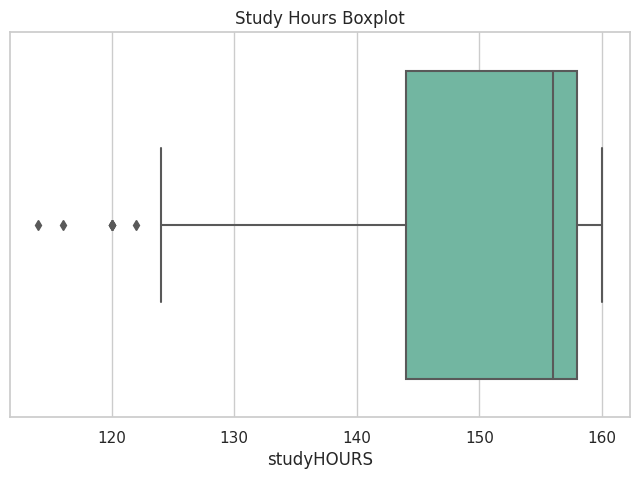

In [17]:
sns.boxplot(x=df['studyHOURS'])
plt.title("Study Hours Boxplot")
plt.show()


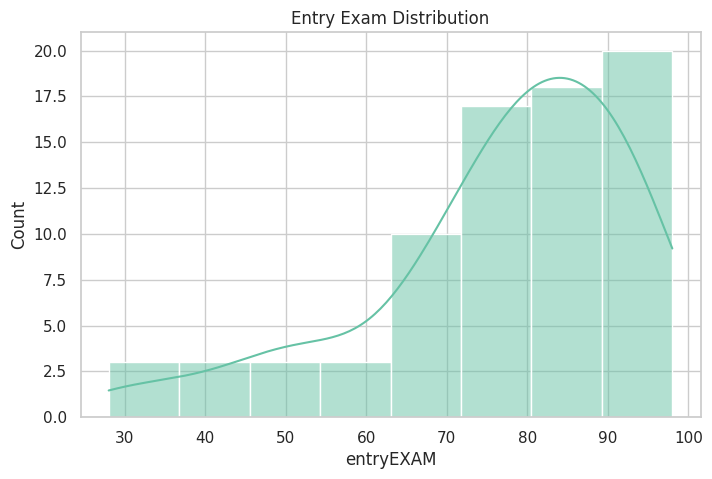

In [18]:
sns.histplot(df['entryEXAM'], kde=True)
plt.title("Entry Exam Distribution")
plt.show()

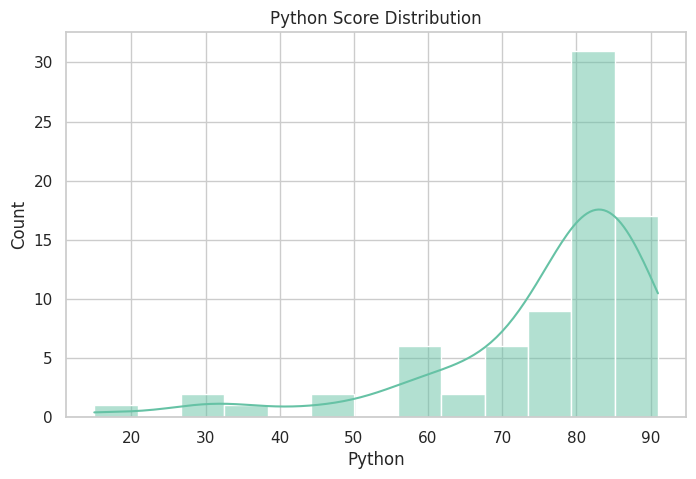

In [19]:
sns.histplot(df['Python'], kde=True)
plt.title("Python Score Distribution")
plt.show()

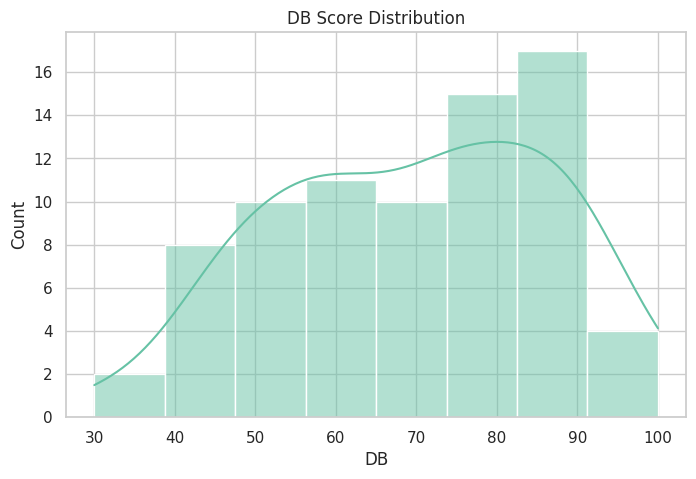

In [20]:
sns.histplot(df['DB'], kde=True)
plt.title("DB Score Distribution")
plt.show()

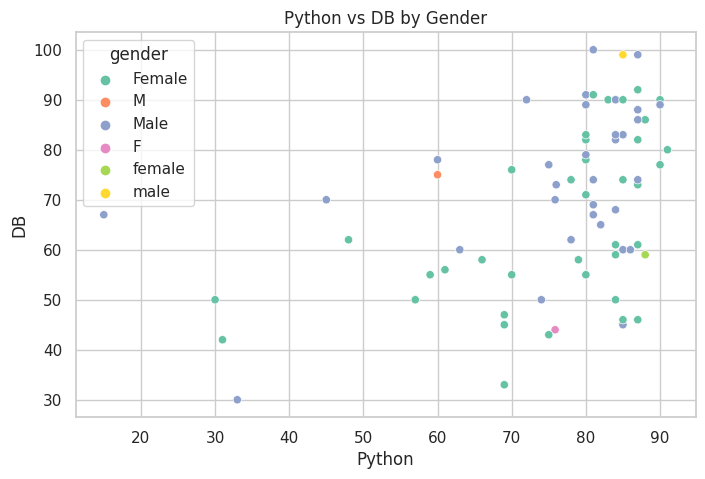

In [21]:
sns.scatterplot(x='Python', y='DB', hue='gender', data=df)
plt.title("Python vs DB by Gender")
plt.show()


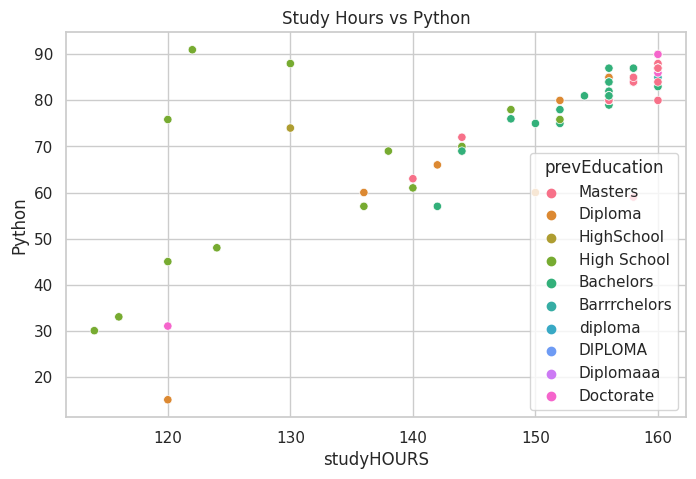

In [22]:
sns.scatterplot(x='studyHOURS', y='Python', hue='prevEducation', data=df)
plt.title("Study Hours vs Python")
plt.show()


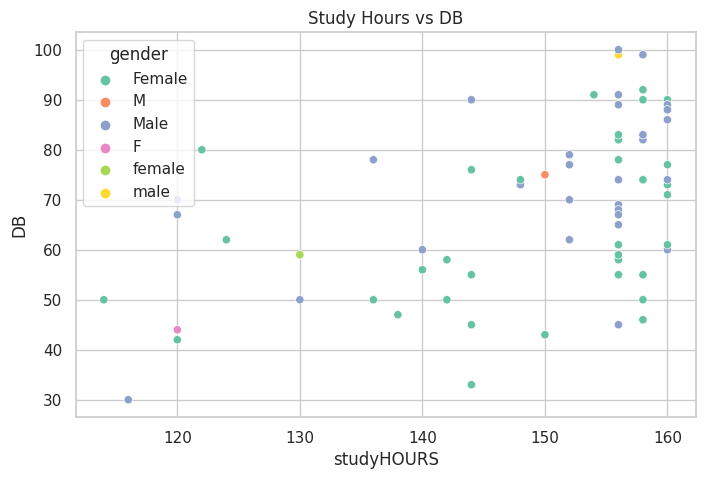

In [23]:
# 15. Study Hours vs DB Scatter
sns.scatterplot(x='studyHOURS', y='DB', hue='gender', data=df)
plt.title("Study Hours vs DB")
plt.show()

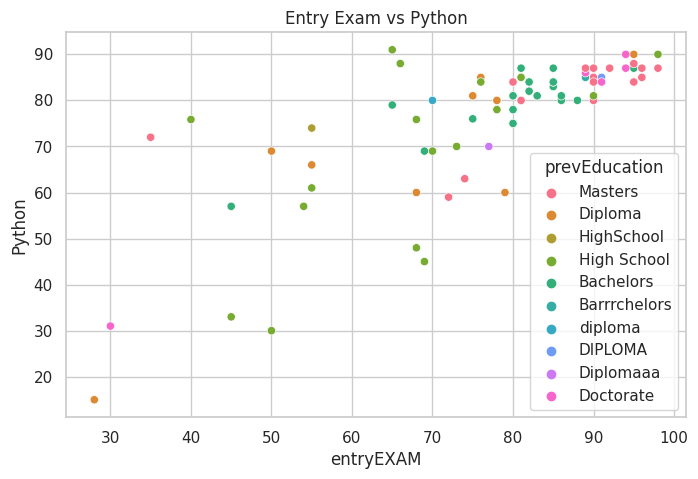

In [24]:
# 16. Entry Exam vs Python Scatter
sns.scatterplot(x='entryEXAM', y='Python', hue='prevEducation', data=df)
plt.title("Entry Exam vs Python")
plt.show()

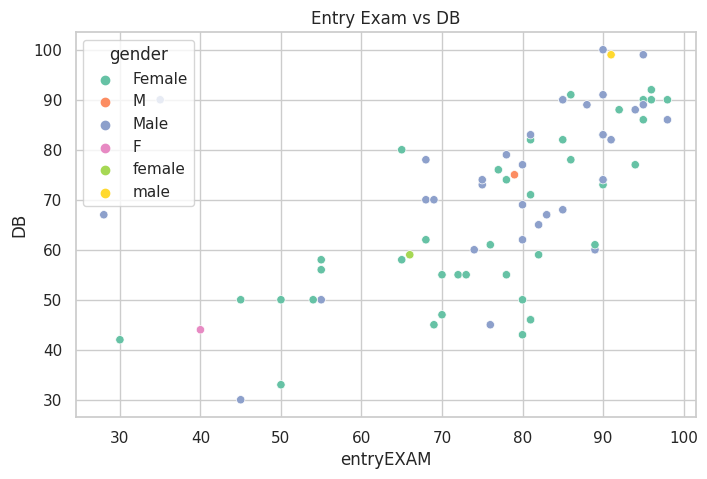

In [25]:
# 17. Entry Exam vs DB Scatter
sns.scatterplot(x='entryEXAM', y='DB', hue='gender', data=df)
plt.title("Entry Exam vs DB")
plt.show()

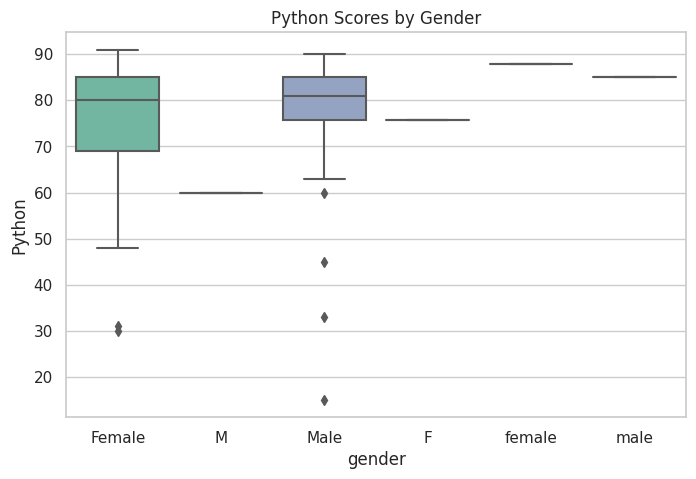

In [26]:
# 18. Gender vs Python Boxplot
sns.boxplot(x='gender', y='Python', data=df)
plt.title("Python Scores by Gender")
plt.show()

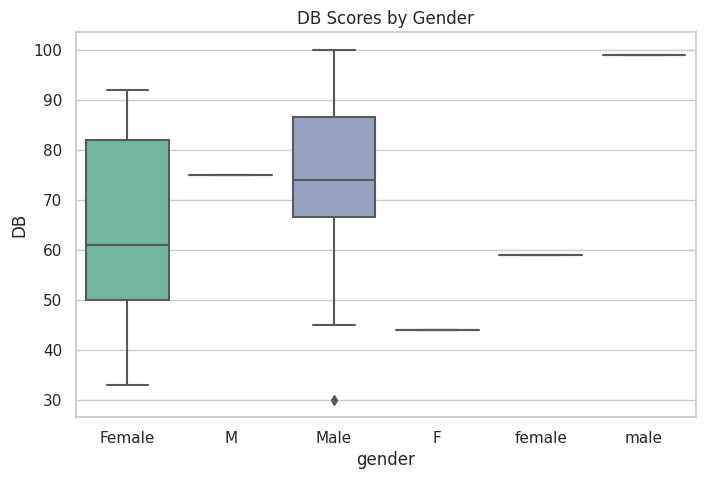

In [27]:
# 19. Gender vs DB Boxplot
sns.boxplot(x='gender', y='DB', data=df)
plt.title("DB Scores by Gender")
plt.show()

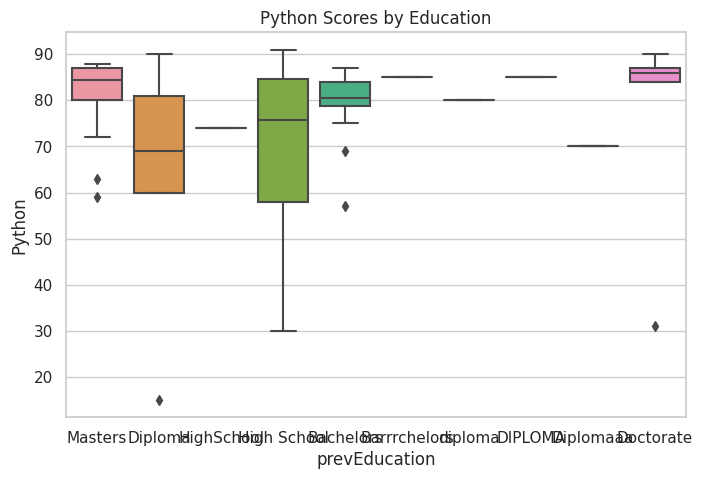

In [28]:
# 20. Previous Education vs Python Boxplot
sns.boxplot(x='prevEducation', y='Python', data=df)
plt.title("Python Scores by Education")
plt.show()

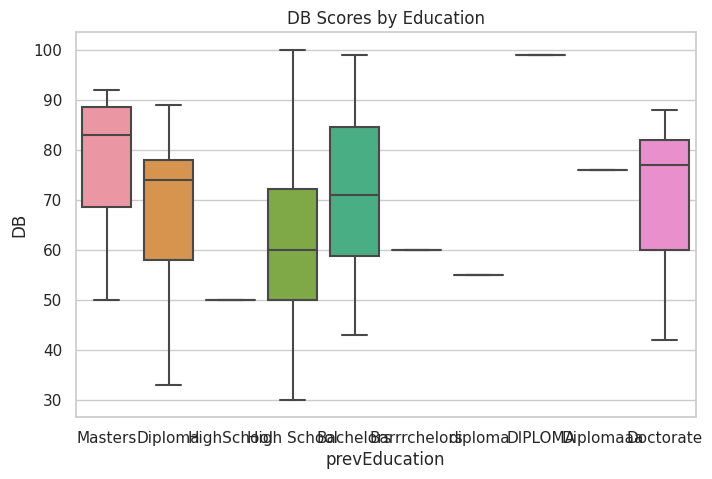

In [29]:
# 21. Previous Education vs DB Boxplot
sns.boxplot(x='prevEducation', y='DB', data=df)
plt.title("DB Scores by Education")
plt.show()

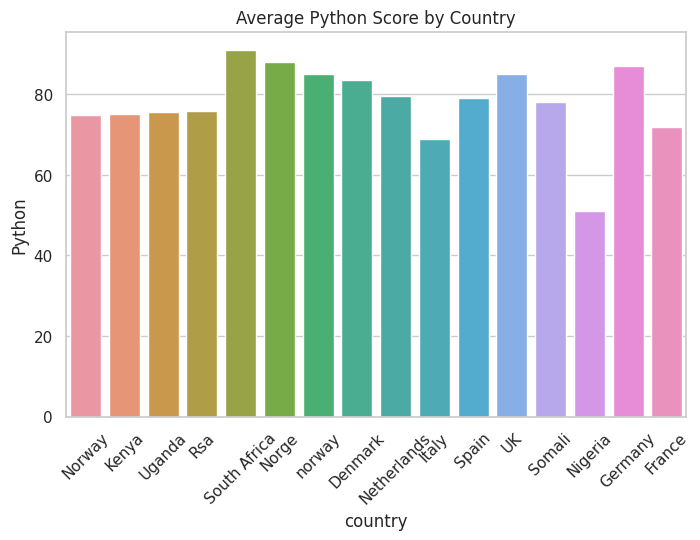

In [30]:
# 22. Country vs Python Barplot
sns.barplot(x='country', y='Python', data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title("Average Python Score by Country")
plt.show()

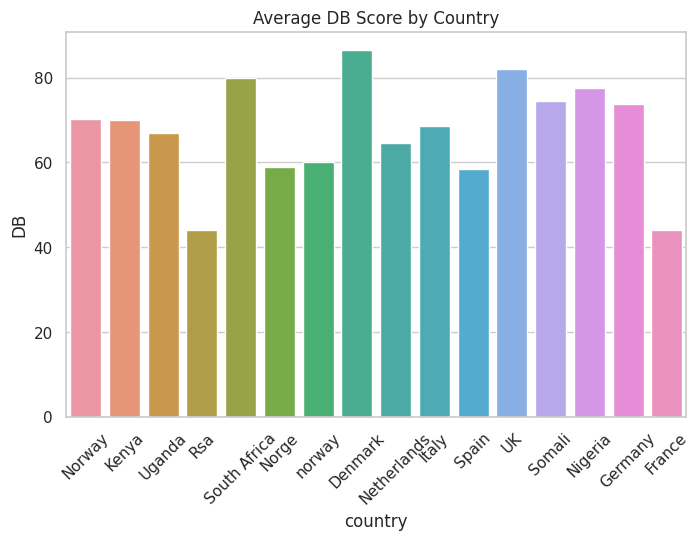

In [31]:
# 23. Country vs DB Barplot
sns.barplot(x='country', y='DB', data=df, estimator="mean", errorbar=None)
plt.xticks(rotation=45)
plt.title("Average DB Score by Country")
plt.show()


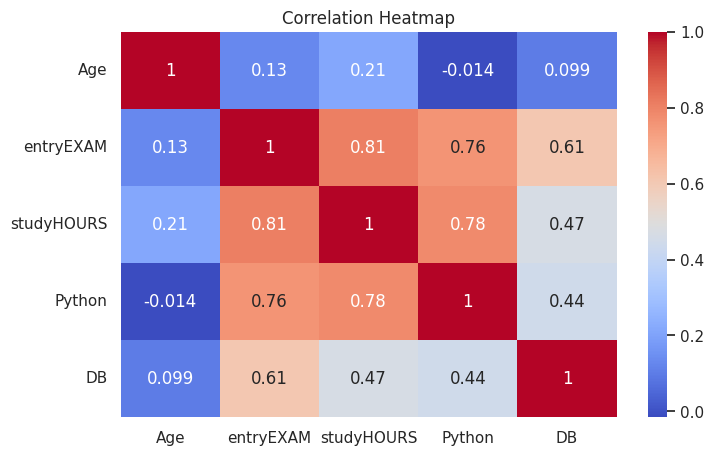

In [32]:
# 24. Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
print(df.columns.tolist())


['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM', 'prevEducation', 'studyHOURS', 'Python', 'DB']


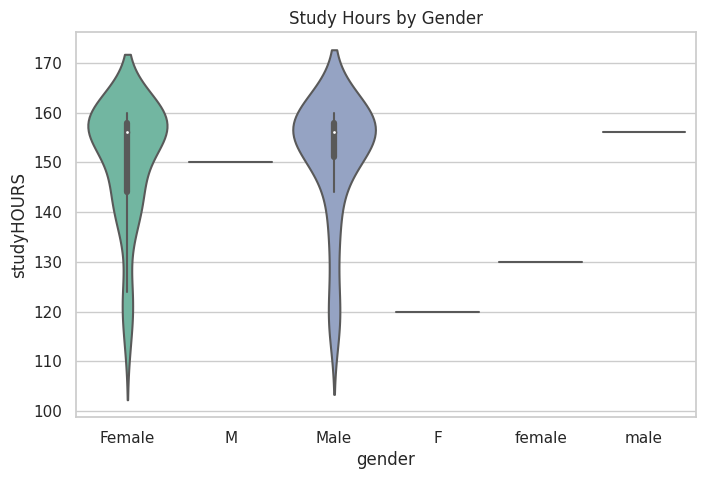

In [34]:
# 26. Violin Plot: Gender vs Study Hours
sns.violinplot(x='gender', y='studyHOURS', data=df)
plt.title("Study Hours by Gender")
plt.show()

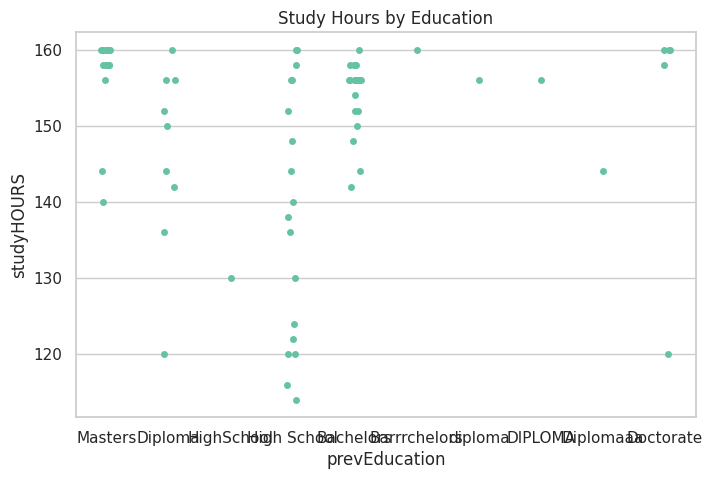

In [35]:
# 27. Stripplot: Education vs Study Hours
sns.stripplot(x='prevEducation', y='studyHOURS', data=df, jitter=True)
plt.title("Study Hours by Education")
plt.show()

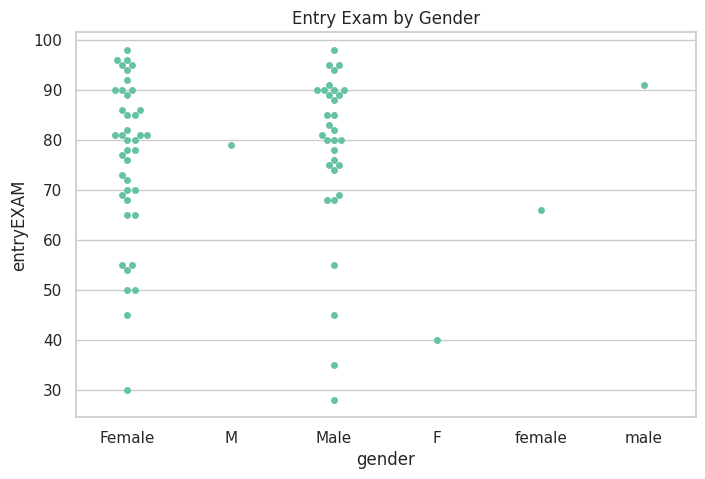

In [36]:
# 28. Swarmplot: Gender vs Entry Exam
sns.swarmplot(x='gender', y='entryEXAM', data=df)
plt.title("Entry Exam by Gender")
plt.show()

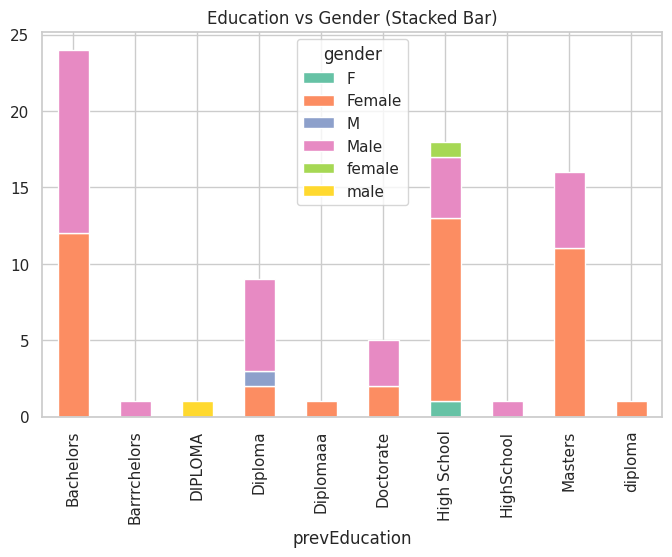

In [37]:
# 29. Stacked Bar: Gender vs Education
pd.crosstab(df['prevEducation'], df['gender']).plot(kind="bar", stacked=True)
plt.title("Education vs Gender (Stacked Bar)")
plt.show()

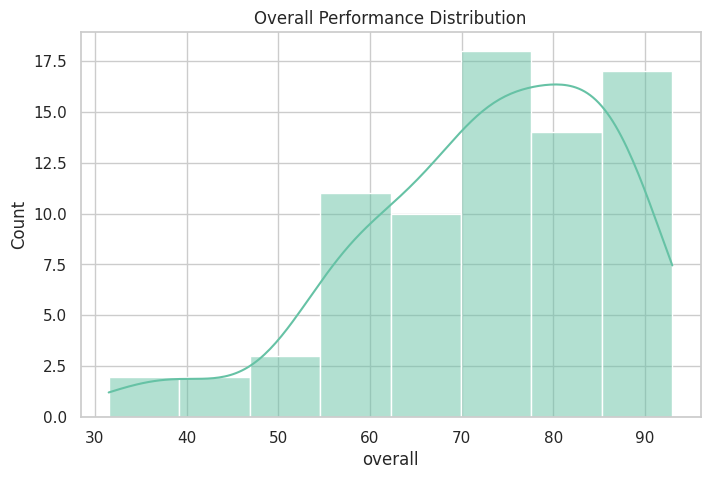

In [38]:
df['overall'] = (df['Python'] + df['DB']) / 2
sns.histplot(df['overall'], kde=True)
plt.title("Overall Performance Distribution")
plt.show()

In [39]:
# Step 5: Detect outliers with IQR
Q1 = df['Python'].quantile(0.25)
Q3 = df['Python'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Python'] < (Q1 - 1.5 * IQR)) | (df['Python'] > (Q3 + 1.5 * IQR)))]

# Step 6: Do the same for DB
Q1 = df['DB'].quantile(0.25)
Q3 = df['DB'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['DB'] < (Q1 - 1.5 * IQR)) | (df['DB'] > (Q3 + 1.5 * IQR)))]

In [40]:
# Step 7: Encode categorical features
cat_cols = ['gender','country','prevEducation','residence','fNAME','lNAME']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [41]:
# Step 8: Create overall score feature
df['overall_score'] = (df['Python'] + df['DB']) / 2

# Step 9: Define features (X) and target (y)
X = df.drop(columns=['overall_score'])   # features
y = df['overall_score']                  # target variable

# Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 11: Apply MinMax Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 12: Define regression models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmse')
}


Model: LinearRegression
MAE: 0.0000, MSE: 0.0000, RMSE: 0.0000, R²: 1.0000
----------------------------------------
Model: Ridge
MAE: 1.4895, MSE: 3.9389, RMSE: 1.9847, R²: 0.9611
----------------------------------------
Model: Lasso
MAE: 3.0000, MSE: 13.7526, RMSE: 3.7084, R²: 0.8643
----------------------------------------
Model: ElasticNet
MAE: 6.6914, MSE: 68.3116, RMSE: 8.2651, R²: 0.3258
----------------------------------------
Model: SVR
MAE: 6.8113, MSE: 69.2579, RMSE: 8.3221, R²: 0.3165
----------------------------------------
Model: DecisionTree
MAE: 0.8049, MSE: 0.8386, RMSE: 0.9157, R²: 0.9917
----------------------------------------
Model: RandomForest
MAE: 0.6891, MSE: 0.6123, RMSE: 0.7825, R²: 0.9940
----------------------------------------
Model: GradientBoosting
MAE: 0.4926, MSE: 0.4024, RMSE: 0.6344, R²: 0.9960
----------------------------------------
Model: AdaBoost
MAE: 0.7781, MSE: 0.9247, RMSE: 0.9616, R²: 0.9909
----------------------------------------
Model: XGB

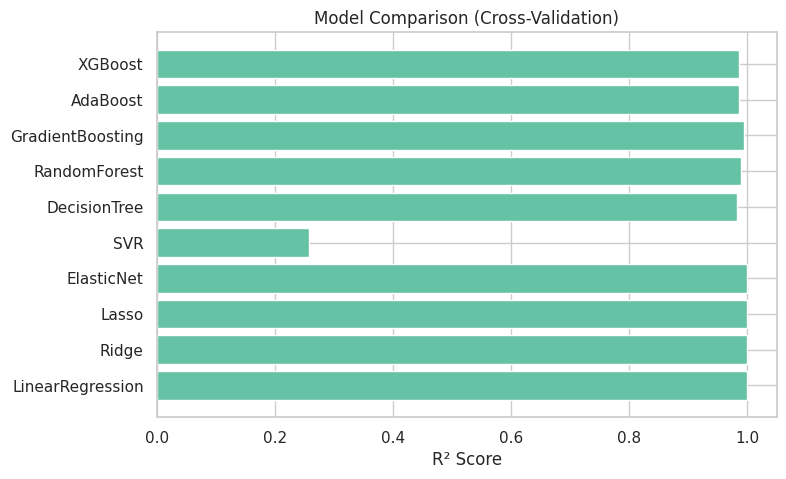

In [42]:
# Step 13: Function for evaluation
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    print("-"*40)

# Step 14–23: Train & Evaluate 10 models
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

# Step 24: Compare models with cross-validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = scores.mean()
    
print("\nCross-validation R² scores:")
print(cv_results)

# Step 25: Visualize model performance
plt.barh(list(cv_results.keys()), list(cv_results.values()))
plt.xlabel("R² Score")
plt.title("Model Comparison (Cross-Validation)")
plt.show()